<a href="https://colab.research.google.com/github/VieiraJardel/Data_Science/blob/main/Projeto_01_Analisando_os_Dados_do_Airbnb_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - *Rio de Janeiro*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade do Rio de Janeiro, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Todos os dados utilizados neste projeto foram obtidos do site  [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Rio de Janeiro (good for visualisations).*

Obs.: O portal está em constante evolução, e em determinado momento, pode ser que o  [conjunto de dados](http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2021-12-24/visualisations/listings.csv) utilizado neste projeto não esteja mais nesta versão.

In [ ]:
#Pacotes para elaboração de gráficos
!pip install pywaffle -q
!pip install plotly==5.1.0 -q

     |████████████████████████████████| 565 kB 5.2 MB/s 
     |████████████████████████████████| 20.6 MB 53.2 MB/s 


In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pywaffle import Waffle
import plotly.express as px

%matplotlib inline

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2021-12-24/visualisations/listings.csv")

## Análise dos Dados

Aqui iremos indicar ao leitor o significado de cada variável deste arquivo, proporcionando um melhor entendimento da estruturação dos dados ao leitor.

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada 
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quato oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review  
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias
* `license` - A licença/autorização/número de registro
* `number_of_reviews_ltm` - O número de avaliações que a propriedade tem (nos últimos 12 meses)

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,NaN,Copacabana,-22.96599,-43.17940,Entire home/apt,350,5,267,2021-12-03,1.92,1,257,10,NaN
1,24480,"Nice and cozy near Ipanema Beach, w/ home office",99249,Goya,NaN,Ipanema,-22.98405,-43.20189,Entire home/apt,296,3,85,2018-02-14,0.62,1,107,0,NaN
2,25026,Beautiful Modern Decorated Studio in Copa,102840,Viviane,NaN,Copacabana,-22.97735,-43.19105,Entire home/apt,387,3,238,2020-02-15,1.69,1,206,0,NaN
3,35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.98839,-43.19232,Entire home/apt,172,2,181,2020-03-15,1.82,1,207,0,NaN
4,35764,COPACABANA SEA BREEZE - RIO - 20 X Superhost,153691,Patricia Miranda & Paulo,NaN,Copacabana,-22.98107,-43.19136,Entire home/apt,260,3,378,2021-12-05,2.76,1,58,32,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Aqui teremos a primeira noção geral do dataset: Entradas, variáveis e o tipo. Com esse passo podemos ter uma dimensão do arquivo e já trabalhar em conversão caso haja alguma irregularidade no tipo de váriavel, por exemplo preço como objeto ou data como texto.

In [ ]:
# identificar o volume de dados do DataFrame
print ("Entradas:\t {}".format(df.shape[0]))
print ("Variáveis:\t {}\n".format(df.shape[1]))

# verificar tipos de entradas do dataset
df.dtypes

Entradas:	 24549
Variáveis:	 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um dataset esta relacionado a quantidade de valores ausentes. É impressidivel de início saber quais e se os valores ausentes são significativos comparados ao montante de dados.

* É possível ver que a coluna `neighbourhood_group` e `license` possuem 100% dos seus valores ausentes.
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em quase 40% das linhas.

Logo, é necessário ter atenção ao utilizar as informações desses 4 itens destacados. `name` e `host_name` possuem em torno de 1% de informaçoes ausentes.

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

license                           1.000000
neighbourhood_group               1.000000
reviews_per_month                 0.365025
last_review                       0.365025
name                              0.000855
host_name                         0.000611
number_of_reviews                 0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
id                                0.000000
minimum_nights                    0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição das variáveis iremos vizualizar atraves de um recuso visual utilizando o histograma como recurso.
Sempre que você não tiver certeza do que fazer com um grande conjunto de dados apresentados, é possível usar um histograma para organizar e exibir os dados em um formato mais amigável. Assim, um histograma tornará fácil ver onde a maioria dos valores se classificam em uma escala de medição e quanta variação existe entre eles. 

O histograma é um gráfico de barras que demonstra uma distribuição de frequências, onde a base de cada uma das barras representa uma classe, e a altura a quantidade ou frequência absoluta com que o valor da classe ocorre. tem como objetivo ilustrar como uma determinada amostra de dados ou população está distribuída, dispondo as informações de modo a facilitar a visualização da distribuição dos dados.  

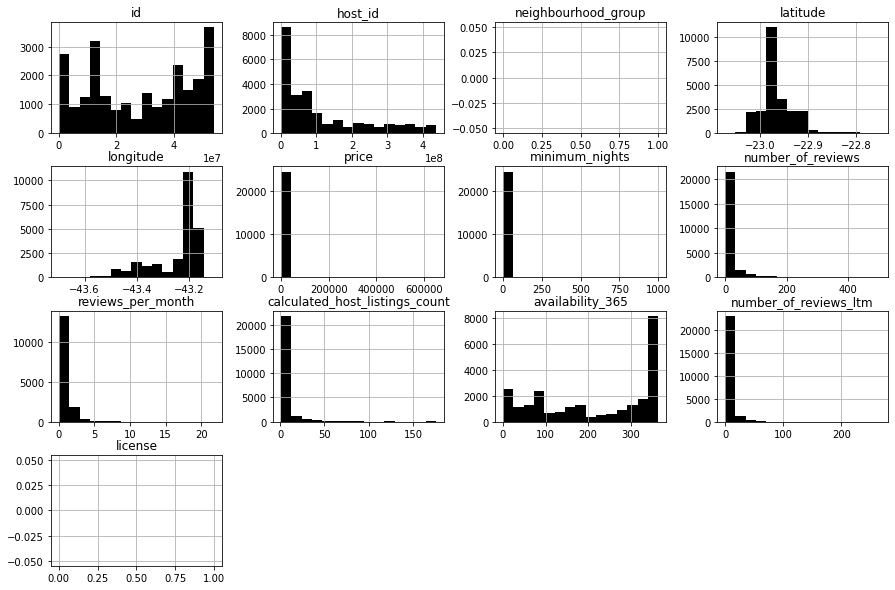

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10), color = 'black');

### **Q5. Há *outliers* presentes?**
Os outliers são dados que se diferenciam drasticamente de todos os outros. Outlier é um valor que foge da normalidade e que pode causar anomalias nos resultados obtidos.
Uma das melhores formas de identificar dados outliers é utilizando gráficos. Pois, ao plotar um gráfico consegue-se claramente perceber que existe algo diferente. 

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.
Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [ ]:
#Ver resumo estatistico das variaveis numericas
df[["price", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365"]].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,24549.000000,24549.000000,24549.000000,15588.000000,24549.000000,24549.000000
mean,1029.592285,5.092142,14.506416,0.691929,7.066642,218.954907
std,5403.742297,21.211509,34.054009,0.935476,20.046954,133.727245
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,250.000000,2.000000,0.000000,0.090000,1.000000,86.000000
50%,479.000000,3.000000,2.000000,0.310000,1.000000,257.000000
75%,900.000000,4.000000,12.000000,0.962500,4.000000,355.000000
max,650476.000000,1000.000000,504.000000,21.790000,176.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como valores discrepantes em relação às colunas price e minimum_nights.

A diferença entre a média (mean) e a mediana (50%) das mesmas colunas, nos revela a presença de outliers e confirma a distribuição dos dados com assimetria positiva.

Em price: Possuimos uma grande quantidade de entradas 24549.
75% dos preços são abaixo de R900,00 reais.  Mas ha algo com o preço maximo de R$650.476,00 reais (existem muitos outliers).


Em minimum nights: Existe um desvio padrão grande, um range grande, uma grande dispersão dos dados.
Minimo 1 noite, ok.
50% acima alugam por 2 dias, provavelmente final de semana: sábado e domingo.
Maximo de noites mil -> outlier claro

* A variável `price` possui 75% do valor abaixo de 900, porém seu valor máximo é R$650.476,00.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.

Desta forma, vamos analisar melhor essas colunas em busca desses valores discrepantes e verificar a possibilidade de eliminá-los da nossa análise.

#### Boxplot para minimum_nights

Baseado em opnião própria: 30 dias é um valor razoável. Remover imóveis com quantidade de minimum nights acima de 30 dias.

minimum_nights: valores acima de 30: 
250 entradas
1.02%
minimum_nights: valores até 30: 
24299 entradas
98.98%


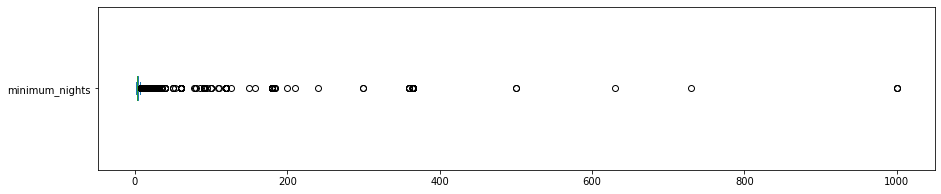

In [ ]:
#Boxplot para minimum nights
df.minimum_nights.plot(kind="box", vert=False, figsize=(15, 3))
plt.show

#Ver quantidade de valores acima de 30 dias  para minimum_nights
print("minimum_nights: valores acima de 30: ")
print("{} entradas".format(len(df[df.minimum_nights>30])))
print("{:.2f}%".format((len(df[df.minimum_nights>30])/df.shape[0])*100))

#Ver quantidade de valores até de 30 dias  para minimum_nights
print("minimum_nights: valores até 30: ")
print("{} entradas".format(len(df[df.minimum_nights<=30])))
print("{:.2f}%".format((len(df[df.minimum_nights<=30])/df.shape[0])*100))

Existem 250 entradas com valores acima de 30 dias que não representam muito mais que 1% dos dados

#### Boxplot para price
Baseado em opnião própria: 2500 reais é um valor razoável. Remover imóveis com quantidade preço acima desse ponto de corte.

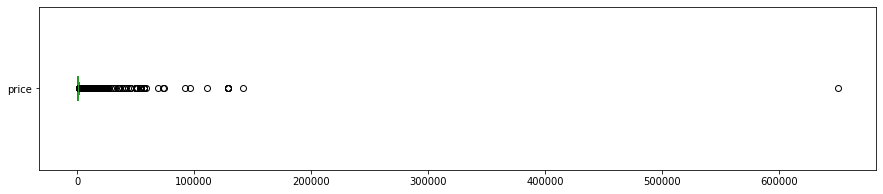


price: valores acima de 2500
1408 entradas
5.74%

price: valores até R$2500
23141 entradas
94.26%


In [ ]:
#Boxplot para price
df.price.plot(kind="box", vert=False, figsize=(15,3))
plt.show()

#Ver quant. de valores acima de R$2500 para price
print("\nprice: valores acima de 2500")
print("{} entradas".format(len(df[df.price>2500])))
print("{:.2f}%".format((len(df[df.price>2500])/df.shape[0])*100))

#Ver quant. de valores até R$2500 para price
print("\nprice: valores até R$2500")
print("{} entradas".format(len(df[df.price <= 2500])))
print("{:.2f}%".format((len(df[df.price <= 2500])/df.shape[0])*100))

Existem 1408 entradas com valores acima de R$2.500 reais que representam 5,74% do dataset, mas estão alterando a percepção dos dados. Esses dados serão excluidos.

#### Histogramas sem *outliers*

Para uma melhor análise, precisamos fazer uma faxina no nosso dataset e obtermos melhores observações.

Vamos remover as colunas com valores ausentes, nulos ou irrelevantes, além de retirar os outliers, que identificamos nas análises anteriores (nas variáveis `price` e `minimum_nights`) e plotar novamente o histograma.

Os valores iguais a 0(zero) e acima de 2.500 reais serão apagados da coluna `price` e da coluna `minimum_nights`, iremos desconsiderar as entradas acima de 30 noites.

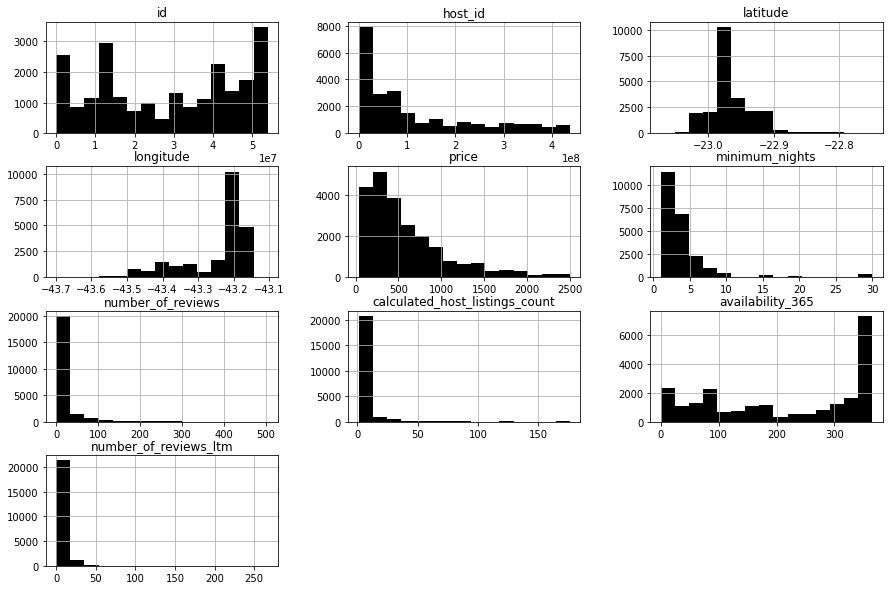

In [ ]:
#Remover outliers em um novo Dataframe
df_clean=df.copy()
df_clean.drop(df_clean[df_clean.price>2500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights>30].index, axis=0, inplace=True)

#Remover colunas com dados ausentes, nulos ou irrelevantes
df_clean.drop(columns = ["neighbourhood_group", "license", 'reviews_per_month', 'last_review'], axis=1, inplace=True)
df_clean.drop(df_clean[df_clean["price"] == 0].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights == 0].index, axis=0, inplace=True)

#Plotar histogramas para variáveis numéricas 
df_clean.hist(bins = 15, figsize=(15, 10), color = "black");

Veja como os dados estão melhor distribuidos, sobretudo no histograma `price`. Note que a maioria dos preços está concentrada até 500 reais.

E no histograma `minimum_nights`, veja que o número mínimo de noites está concentrado entre 1 e 3 noites.

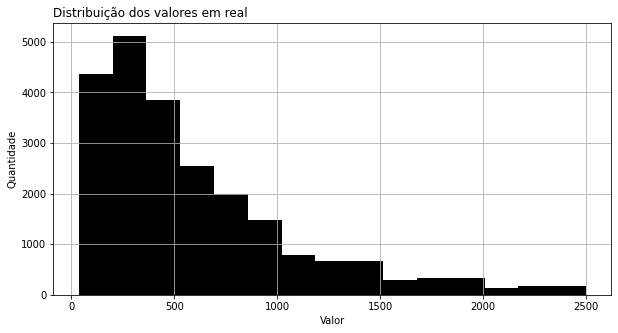

In [ ]:
#Exibindo gráfico price isolado
df_clean.price.hist(bins=15, figsize=(10,5), color = "black")
plt.title("Distribuição dos valores em real", loc = "left")
plt.xlabel("Valor")
plt.ylabel("Quantidade")
plt.show()

In [ ]:
# exibindo um resumo estatístico das variáveis numéricas selecionadas, após a limpeza do dataset
df_clean[["price", "minimum_nights", "number_of_reviews", "calculated_host_listings_count", "availability_365"]].describe()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,22914.000000,22914.000000,22914.000000,22914.000000,22914.000000
mean,594.735969,3.609016,15.122851,6.231736,216.416296
std,493.850739,4.309423,34.779983,18.201524,133.823280
min,35.000000,1.000000,0.000000,1.000000,0.000000
25%,240.000000,2.000000,0.000000,1.000000,85.000000
50%,449.000000,3.000000,2.000000,1.000000,249.000000
75%,800.000000,4.000000,12.000000,3.000000,354.000000
max,2500.000000,30.000000,504.000000,176.000000,365.000000


In [ ]:
#Nova média dos preços de aluguel
print("Media do valor de aluguel antes da limpeza:\t R$ {:.2f}".format(df.price.mean()))
print("Media do valor de aluguel após limpeza:\t         R$ {:.2f}".format(df_clean.price.mean()))

Media do valor de aluguel antes da limpeza:	 R$ 1029.59
Media do valor de aluguel após limpeza:	         R$ 594.74


### **Q6. Qual a correlação existente entre as variáveis**
Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

A correlação busca medir a força da relação entre duas variáveis. Quanto mais o coeficiente de correlação se aproximar de 1.0, maior é a correlação entre elas.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`


In [ ]:
# criar uma matriz de correlação
corr = df_clean[["price", "minimum_nights", "number_of_reviews", "calculated_host_listings_count", "availability_365"]].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
price,1.000000,0.062834,-0.053406,0.192033,0.058785
minimum_nights,0.062834,1.000000,-0.077120,-0.055064,0.001205
number_of_reviews,-0.053406,-0.077120,1.000000,-0.037261,-0.138612
calculated_host_listings_count,0.192033,-0.055064,-0.037261,1.000000,-0.010105
availability_365,0.058785,0.001205,-0.138612,-0.010105,1.000000


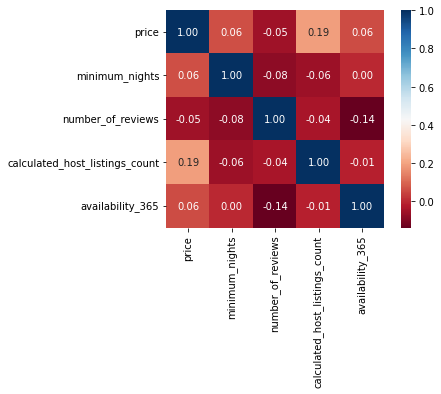

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap="RdBu", fmt=".2f", square=True, linecolor="white", annot=True);

### **Q7. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Existem opções de apartamentos ou casas inteiras, apenas de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método value_counts().

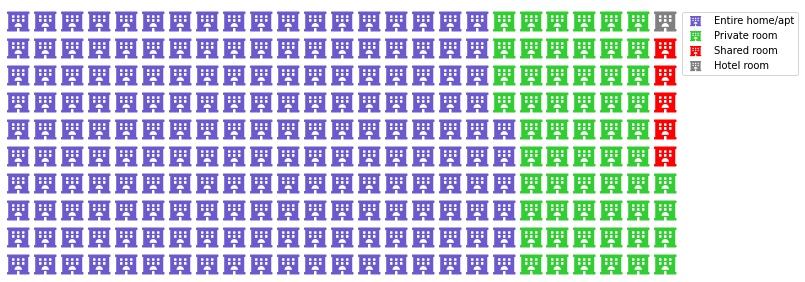

Entire home/apt    17069
Private room        5302
Shared room          480
Hotel room            63
Name: room_type, dtype: int64


In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
roomTp = dict(df_clean.room_type.value_counts())

fig = plt.figure(
    FigureClass=Waffle,
    rows=10,
    columns=25,
    figsize=(12,10),
    colors=('slateblue', 'limegreen', 'red', 'grey'),
    values = roomTp,
    icons="hotel",
    icon_size=20,
    legend={"loc": "upper left", "bbox_to_anchor": (1,1)},
    icon_legend=True
)

fig.set_tight_layout(False)
plt.show();
print(df_clean.room_type.value_counts())

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.744916
Private room       0.231387
Shared room        0.020948
Hotel room         0.002749
Name: room_type, dtype: float64

Dos 04 tipos de acomodação, o mais requerido é o aluguel de casa ou apartamento todo (74%). Alugar um quarto privado vem em segundo com 23%.

### **Q8. Qual a localidade mais cara do dataset?**

Entre os 10 bairros com valores mais elevados vemos que a média de valores variam entre 740 até 1284 reais

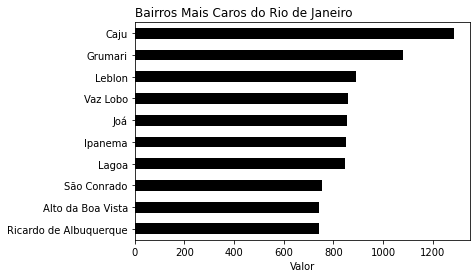

neighbourhood
Caju                      1284.000000
Grumari                   1079.333333
Leblon                     889.173168
Vaz Lobo                   859.500000
Joá                        854.488372
Ipanema                    852.213357
Lagoa                      846.046632
São Conrado                754.212121
Alto da Boa Vista          741.260870
Ricardo de Albuquerque     740.000000
Barra da Tijuca            720.499774
Manguinhos                 684.500000
Gávea                      672.107784
Rocha Miranda              660.500000
Pavuna                     636.333333
Name: price, dtype: float64


In [ ]:
#Gráfico com médias de preço mais altos agrupados por bairros
df_clean.groupby("neighbourhood")['price'].mean().sort_values(ascending=True)[-10:].plot(kind='barh', color = 'black')
plt.title('Bairros Mais Caros do Rio de Janeiro', loc='left')
plt.xlabel('Valor')
plt.ylabel('')                                
plt.show()

print(df_clean.groupby("neighbourhood")['price'].mean().sort_values(ascending=False).head(15))

Vemos que bairros como Caju e Vaz Lobo estão com média de preço superior a de lugares como Barra da Tijuca e Lagoa (locais mais populares).

Uma pessoa que não conhecesse o Rio poderia apresentar esses resultados sem se questionar. Vamos analisar a quantidade de imoveis e as suas entradas para ter uma nocao se faz sentido ou nao sentido a posicao desses locais no ranqueamento.

In [ ]:
#Ver quantidade de imoveis em Caju
print(df_clean[df_clean.neighbourhood == "Caju"].shape)

#Ver as 3 entradas em Caju
df_clean[df_clean.neighbourhood =="Caju"]

(1, 14)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
14483,38109801,You FYI yonder was that good,35690302,JungHo,Caju,-22.89588,-43.21316,Entire home/apt,1284,1,0,1,365,0


In [ ]:
#Ver quantidade de imoveis em Vaz Lobo
print(df_clean[df_clean.neighbourhood == "Vaz Lobo"].shape)

#Ver as 3 entradas em Vaz Lobo
df_clean[df_clean.neighbourhood =="Vaz Lobo"]

(2, 14)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
7793,14221134,"casa colonial 3 quartos, garagem",86402266,Lucia,Vaz Lobo,-22.85527,-43.32623,Entire home/apt,1419,15,0,1,365,0
16810,42012781,Casas flegler,332881900,Igor Flegler De Souza,Vaz Lobo,-22.86187,-43.32458,Private room,300,1,0,1,362,0


Vimos que Caju e Vaz Lobo possuem poucas entradas e um valor elevado de aluguel. Isso influenciou nas suas posicoes no rank.

Vamos fazer um gráfico mostrando os 10 bairros com maiores volumes de imóveis alugados.

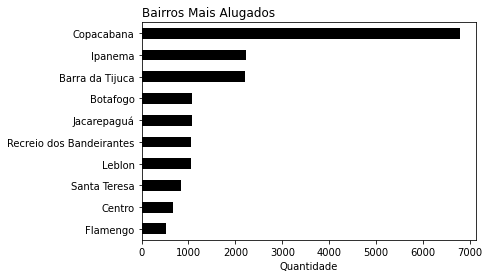

Copacabana                  6799
Ipanema                     2231
Barra da Tijuca             2211
Botafogo                    1077
Jacarepaguá                 1076
Recreio dos Bandeirantes    1059
Leblon                      1051
Santa Teresa                 849
Centro                       666
Flamengo                     523
Leme                         441
Tijuca                       392
Laranjeiras                  373
Camorim                      219
Glória                       218
Name: neighbourhood, dtype: int64

In [ ]:
#Gráfico quantidade de aluguéis agrupados por bairros
df_clean.neighbourhood.value_counts().sort_values()[-10:].plot(kind = 'barh', color = 'black')
plt.title('Bairros Mais Alugados', loc='left')
plt.xlabel('Quantidade')
plt.ylabel('')
plt.show()

#Exibir bairros com as frequencias de aluguel maior para menor
df_clean.neighbourhood.value_counts().head(15)

In [ ]:
#Exibir bairros com as frequencias de aluguel maior para menor em %
df_clean.neighbourhood.value_counts().head(15) / df_clean.shape[0]

Copacabana                  0.296718
Ipanema                     0.097364
Barra da Tijuca             0.096491
Botafogo                    0.047002
Jacarepaguá                 0.046958
Recreio dos Bandeirantes    0.046216
Leblon                      0.045867
Santa Teresa                0.037052
Centro                      0.029065
Flamengo                    0.022824
Leme                        0.019246
Tijuca                      0.017107
Laranjeiras                 0.016278
Camorim                     0.009557
Glória                      0.009514
Name: neighbourhood, dtype: float64

Podemos ver por essa visualização algo mais previsível. Bairros populares, referencias turísticas são mais procurados.




A seguir, as médias dos valores de aluguel dos 10 bairros mais baratos.

Percebemos que os valores variam de 60 a 115 reais e, ainda assim, os bairros mais baratos são pouco alugados.

Parece que os valores mais baixos não são atraentes suficientes para conquistar os hóspedes. No caso, o bairro mais barato (Vista Alegre), com apenas 01 aluguel de quarto compartilhado, fica em uma localização boa no norte do Rio. Talvez por ser um bairro mais residencial não haja interresse em alugar imóveis nessa localidade.

O segundo bairro mais barato apresenta apenas oferta de 02 quartos privados.

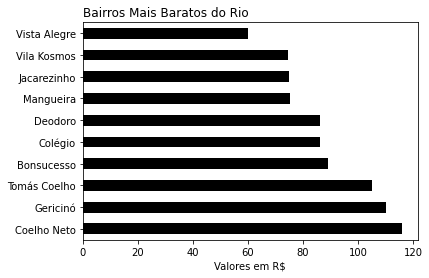

neighbourhood
Vista Alegre     60.000000
Vila Kosmos      74.500000
Jacarezinho      75.000000
Mangueira        75.400000
Colégio          86.000000
Deodoro          86.000000
Bonsucesso       89.052632
Tomás Coelho    105.000000
Gericinó        110.000000
Coelho Neto     115.857143
Name: price, dtype: float64


In [ ]:
# gráfico das menores média dos preços, agrupadas por bairros
df_clean.groupby("neighbourhood")["price"].mean().sort_values(ascending=False)[-10:].plot(kind="barh", color="black")
plt.title('Bairros Mais Baratos do Rio', loc='left')
plt.ylabel("")
plt.xlabel('Valores em R$')
plt.show()

print(df_clean.groupby('neighbourhood')['price'].mean().sort_values(ascending=True)[:10])

### *Mais alugados, mais caros:* 

Bairro - Quant. imóveis - Média Valores (R$)

Coapacabana - 6799 - 609

Ipanema - 2231 - 852

Barra da Tijuca - 2211 - 720

### *Mais alugados, mais baratos:*
Bairro - Quant. imóveis - Média Valores (R$)

Jardim Guanabara - 57 - 242

Estácio - 55 - 302




### *Os 03 bairros mais populares:* 
1 - Copacabana, 2 - Ipanema e 3 - Barra da Tijuca


Vamos fazer uma análise mais detalhada sobre o bairro campeão de hospedagens e descobrir o que ele tem de tão atrativo que justifique ter mais de 29% de todas as hospedagens constantes no nosso dataset.

Veja que no bairro mais querido, 50 % dos alugueis custa menos que 491 reais. E 75% dos valores, custa até 800 reais.

O que há de tão especial nesse bairro, que o coloca na preferência dos viajantes. Vamos vê o que ainda podemos descobrir sobre ele.


In [ ]:
# resumo estatístico dos dados do bairro -
df_clean[df_clean['neighbourhood'] == 'Copacabana']['price'].describe()

count    6799.000000
mean      609.857773
std       447.248079
min        50.000000
25%       297.000000
50%       491.000000
75%       800.000000
max      2500.000000
Name: price, dtype: float64

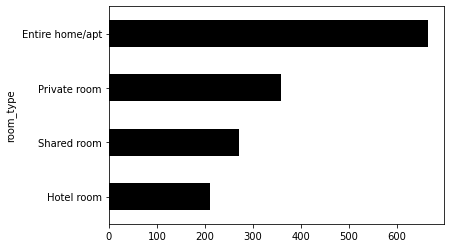

In [ ]:
#Valores médios dos tipos de acomodação em Copacabana
df_clean[df_clean['neighbourhood'] == 'Copacabana'].groupby(['room_type']).price.mean().sort_values(ascending=True).plot(kind='barh', color="black");


In [ ]:
# ver a média da coluna `minimum_nights` em Leblon
df_clean.loc[df_clean['neighbourhood']== "Copacabana"].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


id                                3.049200e+07
host_id                           1.162082e+08
latitude                         -2.297263e+01
longitude                        -4.318622e+01
price                             6.098578e+02
minimum_nights                    3.345345e+00
number_of_reviews                 2.007869e+01
calculated_host_listings_count    8.390057e+00
availability_365                  1.985461e+02
number_of_reviews_ltm             4.835564e+00
dtype: float64

In [ ]:
# plotar os imóveis pela latitude-longitude
px.density_mapbox(df_clean,
                  z = 'price',
                  lat = 'latitude', 
                  lon = 'longitude', 
                  radius = 1, 
                  zoom = 12,
                  width = 1000,
                  height = 500, 
                  mapbox_style = 'open-street-map')

Com este gráfico de quantidade de imóveis com indicação do preço podemos ter uma visão de onde ocorrem as maiores demandas. Podemos ver uma grande concentração na Região Sul do Rio englobando Copacabana, Ipanema, Leblon. Também podemos ver um pequeno aglomerado em Jacarepaguá e na Barra da Tijuca.

Neste outro gráfico podemos ver os bairros com a marcação de pontos turísticos


A maior procura encontra-se na Zona Sul. Trata-se da região mais turística do Rio, onde ficam as praias e os hotéis mais famosos da cidade. Além do mar, suas outras atrações turísticas incluem: Lagoa Rodrigo de Freitas, Parque Penhasco Dois Irmãos, Cristo Redentor, Jardim Botânico, Pão de Açúcar e boa parte do Aterro do Flamengo. 

A segunda maior procura encontra-se na Zona Oeste. É a segunda região mais populosa do Rio e onde estão vias como a Linha Amarela e a maior parte dos corredores de BRT, que ligam essa parte da cidade à Zona Sul e ao centro. Seu bairro mais procurado é a Barra da Tijuca, onde há enormes empreendimentos residenciais. Entre as atrações turísticas da região estão a Lagoa da Tijuca, o Parque Estadual da Pedra Branca e as praias da Barra da Tijuca, Pontal e Joatinga.

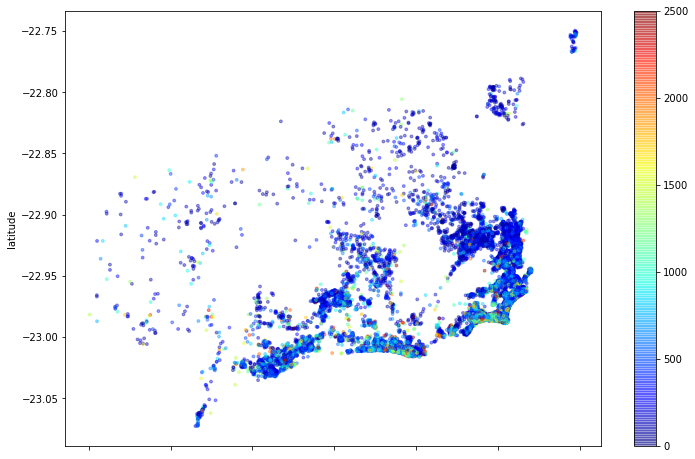

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", 
              x="longitude", 
              y="latitude", 
              alpha=0.4, 
              c=df_clean["price"], 
              s=8, 
              cmap=plt.get_cmap("jet"), 
              figsize=(12,8));

### **Q9. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``
df_clean.minimum_nights.mean()

3.6082631647833865

In [ ]:
# ver a média da coluna `minimum_nights` em Leblon
df_clean.loc[df_clean['neighbourhood']== "Leblon"].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


id                                2.842936e+07
host_id                           8.671607e+07
latitude                         -2.298349e+01
longitude                        -4.322315e+01
price                             8.891732e+02
minimum_nights                    3.556613e+00
number_of_reviews                 2.014653e+01
reviews_per_month                 7.570232e-01
calculated_host_listings_count    1.006375e+01
availability_365                  1.930343e+02
number_of_reviews_ltm             4.627022e+00
dtype: float64

## Conclusões


  Através de uma simples análise, limpeza e com uma versão simplificada de conjuntos de dados conseguimos extrair informações valiosas. Tentei ao máximo ponderar o trabalho para que não ficasse muito técnico, mas também não quis deixar mostrar algumas etapas essenciais. O projeto completo com mais detalhes e com o código encontra-se no meu GitHub. Pela análise técnica trabalhamos com importação, verificação, análise e a limpeza do dataset. Pela análise exploratória verificamos o resumo estatístico, os tipos de acomodação disponíveis, mínimo de noites para estadia, top 10 barros mais alugados, mais caros e mais baratos. Conseguimos enxergar tudo isso visualmente em gráficos de barras e depois de maneira geral no mapa do município do Rio de Janeiro.
  A ideia futura é expandir esse trabalho na versão mais complexa do dataset disponibilizado pelo Airbnbn com quase 25 mil linhas e 74 variáveis (colunas), aumentando a quantidade e qualidade das informações. Outra opção é expandir esse trabalho de análise para outras cidades ao redor do mundo.

  Por fim, após o mergulho nos dados, percebi o quanto foi possível conhecer mais e melhor sobre a cidade de Montreal e, acredito ter sido um ótimo exercício de extração de valor dos dados para auxiliar no planejamento de uma futura viagem.

  Mesmo tendo que dividir meu tempo com estudos, faculdade e trabalho pude concluir esse projeto. Me sinto muito gratificado, foi um trabalho incrível sobre uma cidade maravilhosa e um ótimo exercício de extração de valor dos dados para auxiliar no planejamento de uma futura viagem para o Rio, pretendo fazer esse exercicio quando for me aventurar em outros países.

